## Estadística Aplicada

Sesión 8 - 06 septiembre

Karla Mariana Ley Acero- 2076201

Grupo 42

In [1]:
## Librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Librerias especializadas 
from lifelines import KaplanMeierFitter

In [3]:
## Importamos los datos 

relacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

Esta base de datos muestrael tiempo de supervivencia de una relación en semanas (t), el evento es que la relación se termine, la columa estado es la columna de evento/censura.

La muestra es de 42 personas que estan en una relación.

La variable tratamiento toma dos valores 0 y 1 (el 1 es detallista y el 0 es que no lo es)

In [4]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


In [5]:
relacion.count()

tratamiento    42
t              42
estado         42
dtype: int64

In [6]:
## Estimador de Kaplan-Meier de la funcion de supervivencia

km1 = KaplanMeierFitter().fit(relacion['t'], relacion['estado'])

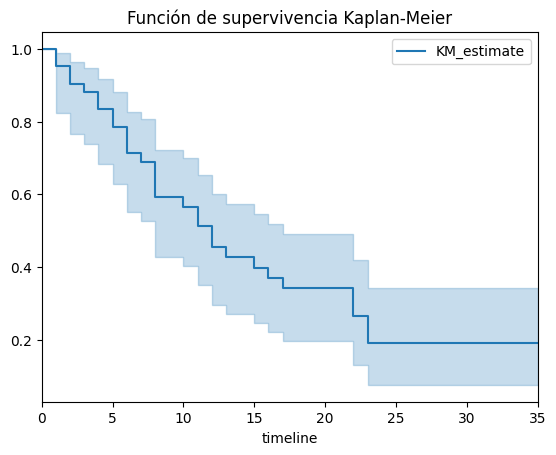

In [7]:
## Observamos la gráfica de la función de supervivencia 
## El área sombreada es el intervalo de confianza al 95%

km1.plot_survival_function()
plt.title('Función de supervivencia Kaplan-Meier')
plt.xlim(0,35);

In [8]:
## Función de supervivencia

km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.952381
2.0,0.904762
3.0,0.880952
4.0,0.833333
5.0,0.785714
6.0,0.714286
7.0,0.689655
8.0,0.591133


In [9]:
## Mostrar los valores de IC
# Muestra los intervalos de confianza al 95%

km1.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
1.0,0.822743,0.987873
2.0,0.765847,0.963148
3.0,0.737342,0.948639
4.0,0.681928,0.916833
5.0,0.628621,0.882248
6.0,0.552081,0.826483
7.0,0.526178,0.806536
8.0,0.426898,0.722754
9.0,0.426898,0.722754


In [10]:
## Mediana de la función de supervivencia

km1.median_survival_time_

12.0

La mediana del tiempo de supervivencia es 12 semanas, lo que significa que la mitad de las relaciones han terminado en la semana 12 o que la mitad de las relaciones duran mas de 12 semanas

In [11]:
## Separar la base de datos en detallistas (1) y no detallistas (0)

detallistas = relacion.query('tratamiento == 1')

no_detallistas = relacion.query ('tratamiento == 0')

In [12]:
## Crear la funcion de Kaplan-Meier de los detallistas

km_d = KaplanMeierFitter().fit(detallistas ['t'], detallistas['estado'])
km_nd = KaplanMeierFitter().fit(no_detallistas['t'], no_detallistas['estado'])

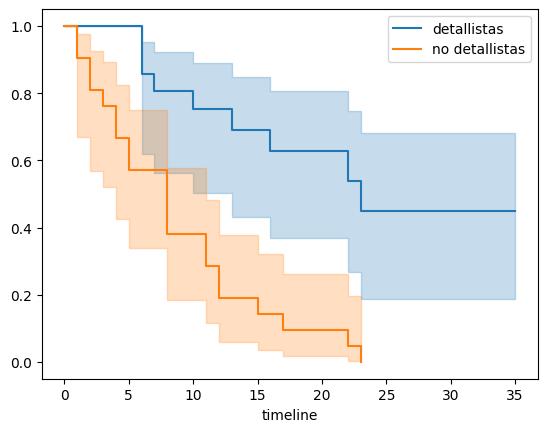

In [13]:
km_d.plot_survival_function(label = 'detallistas')
km_nd.plot_survival_function(label = 'no detallistas');

*Si los intervalos de confianza se intersectan significa que las funciones de supervivencia son iguales*

Para verificar que las funciones sean diferentes se crea una prueba de hipotesis

Prueba de hipotesis se llama **Log-rank-test**

$Ho: S(1) = S(2)$ *(funciones de supervivencia iguales)*

$Ha: S(1) \neq S(2)$ *(funciones de supervivencia distintas)*

In [14]:
from lifelines.statistics import logrank_test

In [18]:
## Realizamos el Log-rank-test
# Estructura: longrank_test ( tiempog1, tiempog2, eventog1, eventog2)
LRT = logrank_test(detallistas['t'], no_detallistas['t'], detallistas['estado'], no_detallistas['estado'])


In [19]:
LRT.print_summary() #Tabla de salida de prueba de hipotesis

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [20]:
LRT.p_value.round(2)

0.0

Como p value<alfa

Rechazamos H0 con 95% de confianza. Las funciones de supervivencia son distintas

La relación de los detallista duran más que las relaciones de los no detallistas

In [21]:
km_d.median_survival_time_
#Esto quiere decir que el 50% de las relaciones de los detallistas dura mas de 23 semanas


23.0

In [23]:
km_nd.median_survival_time_
#Esto quiere decir que el 50% de las relaciones de los detallistas dura mas de 8 semanas


8.0